In [7]:
print('Hello world')

Hello world


## Решение системы уравнений методом Ньютона

$$ \begin{cases}
   f_1(x_1) = 0 
   \\
   f_2(x_2) = 0
   \\
   \dots
   \\
   f_n(x_n) = 0
 \end{cases}$$

Введём обозначения
$$ x = (x_1, x_2, ..., x_n)^{T} $$
$$F(x) = [f_1(x), f_2(x), ..., f_n(x)]^{T}$$
$$\Delta x^{k} = x^{k+1} - x^{k} $$

$$
W = \left(
\begin{array}{cccc}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \ldots & \frac{\partial f_1}{\partial x_n}\\

\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \ldots & \frac{\partial f_2}{\partial x_n}\\

\vdots & \vdots & \ddots & \vdots\\

\frac{\partial f_n}{\partial x_1} & \frac{\partial f_n}{\partial x_2} & \ldots & \frac{\partial f_n}{\partial x_n}
\end{array}
\right)
$$

##### Формула для нахождения решения

$$ x^{k+1} = x^{k} - W^{-1}(x^{k})*F(x^{k}) $$ 

Преобразуем её к виду
$$ W(x^{k})*\Delta x = -F(x^{k}) $$


Получили матричное уравнение, которое мы будем решать относительно  $\Delta x $

Будем использовать метод Гаусса

### Алгоритм
1) Задать начальное приближение и точность 
1) Решить систему уравнений относительно $ \Delta x$
1) Вычислить следущее приближение  
$ \Delta x^{k} = x^{k+1} - x^{k}  $

1) Если 
$$ \underset{i}{max} (|x_i^{k+1} - x_i^{k}|) < \epsilon $$
то решение найдено, 
$$x = x_i^{k+1}$$
иначе идём к шагу 2

#### Приступаем к заданию

Наша система
$$ \begin{cases}
   x^2 + y^2 - 1 = 0
   \\
   e^{-x^{2}}* e^{-2y^{2}} - 0.25 = 0
 \end{cases}$$

$$ \begin{cases}
    y = \pm \sqrt {1 - x ^2}
   \\
   y = \pm \sqrt{ -\frac{1}{2}  * ln(0.25 * e^{x^{2}})}
 \end{cases}$$

In [8]:
import numpy as np

x = np.linspace(-5, 5, 20)

def f(x):
    return np.sqrt(
        -0.5 * np.log(
            0.25 * np.exp(x**2)
        )
    )

y = f(x)
y

/var/folders/m7/h7f85n8j74nb5tj4z8vtd28w0000gn/T/ipykernel_4108/1745641142.py:6: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(


array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.61766725, 0.81149316,
       0.81149316, 0.61766725,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan])

In [9]:
import sympy

x = sympy.Symbol('x')
sympy.solve(x**2 - 12*x + 35, x)

[5, 7]

In [10]:
import sympy

x = sympy.Symbol('x')
sympy.solvers.solvers.nsolve(x**2 - 12*x + 35, x, 0)

5.00000000000000

Нарисуем графики функций, чтобы приблизительно прикинуть решения системы

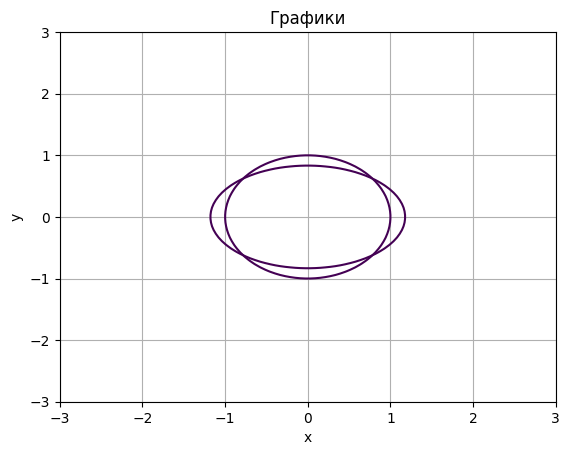

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def equation(x, y):
    return np.exp(-x**2) * np.exp(-2*y**2) - 0.25

def equation1(x,y):
    return x**2 + y**2 - 1


# Create a grid of x and y values
x = np.linspace(-3, 3, 100) 
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

#X - в каждой строке 100 чисел от -3 до 3 с определённым шагом
#Y – в каждой строке 100 одинаковых чисел. По строкам значения меняются от -3 до 3 с определённым шагом


#Функция np.meshgrid(x, y) создает координатные сетки X и Y,
#  где X содержит повторяющиеся значения координат x в строках,
#  а Y содержит повторяющиеся значения координат y в столбцах. 
# Это позволяет нам оценить значения функций equation и equation1 для 
# каждой точки в координатной сетке, используя X и Y.



# Evaluate the equation for all points in the grid
Z = equation(X, Y)
Z1 = equation1(X, Y)

# Plot the equation using Matplotlib
plt.contour(X, Y, Z, levels=[0])
plt.contour(X, Y, Z1, levels=[0])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Графики')
plt.show()

Видим, что у нас есть 4 действительных решения

$$ x \approx \pm 0.7 $$
$$ y \approx \pm 0.6 $$

Если более точно, то 
$$ x \approx \pm 0.783394 $$
$$ y \approx \pm 0.621526 $$

Итак нашим начальным приближением будет (возьмем менее точно для примера)

$$ x = (0.7, 0.6) $$

In [13]:
### Возьмем производные
# (можно взять и вручную, но так программисты не поступают)

import sympy 

x, y = sympy.symbols('x y')
F1 = x**2 + y**2 - 1

dF1_dx = sympy.diff(F1, x)
dF1_dy = sympy.diff(F1, y)

dF1_dx

2*x

In [14]:
dF1_dy

2*y

In [15]:
F2 = sympy.exp(-x**2)*sympy.exp(-2*y**2) - 0.25

dF2_dx = sympy.diff(F2, x)
dF2_dy = sympy.diff(F2, y)

print(dF2_dx)
dF2_dx

-2*x*exp(-x**2)*exp(-2*y**2)


-2*x*exp(-x**2)*exp(-2*y**2)

In [16]:
print(dF2_dy)
dF2_dy

-4*y*exp(-x**2)*exp(-2*y**2)


-4*y*exp(-x**2)*exp(-2*y**2)

### Начинаем решать 

Зададим начальное приближение x

In [17]:
x = np.array([0.5,
              0.3])  

x    

array([0.5, 0.3])

Зададим матрицу Якоби

In [18]:
## Напишем функцию, которая будет рассчитывать матрицу Якоби


def Jacob(x):
    '''
    Рассчёт Якобиана в точке x, y
    x - вектор-столбец (np.array)
    x[0] – это x (в старых обозначениях)
    x[1] – это y (в старых обозначениях)
    '''
    J_11 = 2 * x[0]
    J_12 = 2 * x[1]
    J_21 = -2 * x[0] * np.exp(- (x[0] ** 2)) * np.exp(-2* x[1] **2)
    J_22 = -4 * x[1] * np.exp(- (x[0]**2)) * np.exp(-2* (x[1]**2))

    J = np.array([
                    [J_11, J_12],
                    [J_21, J_22]
                ])
    
    return J

Jacob(x)

array([[ 1.        ,  0.6       ],
       [-0.65050909, -0.78061091]])

Зададим функции

In [19]:
def f_1(x):
    '''    
    x - вектор-столбец в формате np.array
    '''
    return np.exp(-(x[0]**2)) * np.exp(-2*(x[1]**2)) - 0.25

def f_2(x):
    '''    
    x - вектор-столбец в формате np.array
    '''
    return x[0]**2 + x[1]**2 - 1
    

$$F(x) = [f_1(x), f_2(x), ..., f_n(x)]^{T}$$

In [20]:
def F(x):
    '''
    Функция рассчитывает значение вектора F
    в точке (x,y)
    Для этого считаем значение equation и equation1
    '''
    answer = np.array([
                      f_1(x),
                      f_2(x)
                      ])
    
    return answer


F(x)

array([ 0.40050909, -0.66      ])

In [21]:
import numpy as np



x1 = np.linalg.solve(Jacob(x), -F(x))

print(x1)

[ 0.21357178 -1.02346812]


In [22]:
from tqdm import tqdm

def solution(x, eps=1e-5, max_iter=50):
    '''
    Solves the system of equations using the Newton-Raphson method.
    x: initial guess for the solution
    eps: tolerance for the solution
    max_iter: maximum number of iterations
    '''
    for i in tqdm(range(max_iter)):
        

        try:
            delta_x = np.linalg.solve(Jacob(x), -F(x))
        except np.linalg.LinAlgError:
            print("Singular matrix. Stopping the iteration.")
            return x
        
        x = x + delta_x
        
        #Функция F показывает, насколько далеко наше решение от истинного
        if np.linalg.norm(F(x)) < eps:
            return x
    
    print("Maximum number of iterations reached. Stopping the iteration.")
    return None

#solution(x)
solution(np.array([0.5, 0.5]))

  6%|▌         | 3/50 [00:00<00:00, 11915.64it/s]

Singular matrix. Stopping the iteration.


array([-5204459.52367745,  -892273.87652737])

In [23]:
### декоратор замеряет время функции

import time

def time_it(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"Function {func.__name__} took {end - start} seconds to execute.")
        return result
    return wrapper

In [24]:
### Код всё в одной ячейке




import numpy as np

def Jacob(x):
    '''
    Computes the Jacobian matrix of the system of equations
    at the point (x, y).
    '''
    J_11 = 2 * x[0]
    J_12 = 2 * x[1]
    J_21 = -2 * x[0] * np.exp(- (x[0] ** 2)) * np.exp(-2* x[1] **2)
    J_22 = -4 * x[1] * np.exp(- (x[0]**2)) * np.exp(-2* (x[1]**2))

    J = np.array([
                    [J_11, J_12],
                    [J_21, J_22]
                ])
    
    return J

def f(x):
    '''    
    Computes the system of equations at the point (x, y).
    '''
    f1 = x[0]**2 + x[1]**2 - 1
    f2 = np.exp(-(x[0]**2)) * np.exp(-2*(x[1]**2)) - 0.25
    
    return np.array([f1, f2])


#@time_it
def solution(x, eps=1e-5, max_iter=50):
    '''
    Solves the system of equations using the Newton-Raphson method.
    x: initial guess for the solution
    eps: tolerance for the solution
    max_iter: maximum number of iterations
    '''
    for i in range(max_iter):
        J = Jacob(x)
        f_val = f(x)
        
        # solve the linear system J * delta_x = -f(x)
        try:
            delta_x = np.linalg.solve(J, -f_val)
        except np.linalg.LinAlgError:
            print("Singular matrix. Stopping the iteration.")
            return None
        
        x = x + delta_x
        
        
        # check the convergence criterion
        if np.linalg.norm(f(x)) < eps:
            print(f'{i} iterations')
            return x
    
    print("Maximum number of iterations reached. Stopping the iteration.")
    return None

# initial guess for the solution
x0 = np.array([0.5, 0.5])

# solve the system of equations
sol = solution(x0)

if sol is not None:
    print("Solution found:")
    print(sol)
else:
    print("No solution found.")



pass

4 iterations
Solution found:
[0.78339367 0.62152583]


In [25]:
x0 = np.array([0.5, 0.5])
solution(x0)

4 iterations


array([0.78339367, 0.62152583])

In [26]:
try:
    a = 2 + 2
    #10 / 0
    #'abc' / 2
except ZeroDivisionError: 
    0 / 10
    print('a')
except TypeError:
    print('hello')
finally:
    print('Finally')

Finally


In [27]:
#@time_it
def solution_rec(x, eps=1e-5, depth=50):
    '''
    Та же самая функция, но задана рекурсивно
    '''
    J = Jacob(x)
    f_val = f(x)

    i = 0

    try:
        delta_x = np.linalg.solve(J, -f_val)

        x = x + delta_x

        i += 1

        if np.linalg.norm(f(x)) < eps:
            print(f'{i} iterations')
            return x
        elif i <= depth:
            return solution_rec(x)
            
        
    except np.linalg.LinAlgError:
        print("Singular matrix. Stopping the iteration.")
        return x

x0 = np.array([0.5, 0.5])

solution_rec(x0)

1 iterations


array([0.78339367, 0.62152583])

In [28]:
times = 4.00543212890625e-05 + 7.224082946777344e-05 + 9.965896606445312e-05 + 0.00013208389282226562 + 0.0002129077911376953

print(0.0005331039428710938 < times)

True


Первая функция сработала быстрее

## Найдём все решения

In [29]:
#Функцией без использования рекурсии

for i in [0.5, -0.5]:
    for j in [0.5, -0.5]:
        #print(f'i = {i}, j = {j}')
        x0 = np.array([i, j])
        print(solution(x0))
        print()

4 iterations
[0.78339367 0.62152583]

4 iterations
[ 0.78339367 -0.62152583]

4 iterations
[-0.78339367  0.62152583]

4 iterations
[-0.78339367 -0.62152583]



In [30]:
#Функцией c использованием рекурсии

for i in [0.5, -0.5]:
    for j in [0.5, -0.5]:
        #print(f'i = {i}, j = {j}')
        x0 = np.array([i, j])
        print(solution_rec(x0))
        print()

1 iterations
[0.78339367 0.62152583]

1 iterations
[ 0.78339367 -0.62152583]

1 iterations
[-0.78339367  0.62152583]

1 iterations
[-0.78339367 -0.62152583]

